In [1]:
import warnings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
title_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
movie_budgets = pd.read_csv('data/tn.movie_budgets.csv.gz')

In [3]:
# Create a column for year in movie_budget table
# Since release date is in "month day, year" format, we are going to take only the last four string of the release date and 
# we are going to change the year to float
movie_budgets['release_year'] = movie_budgets['release_date'].str[-4:].astype(float)

#Combine movie_budget table with title_basics using movie title and released year
profit = movie_budgets.merge(title_basics, how='left', left_on=['movie', 'release_year'], right_on=['original_title', 'start_year'])
profit.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019.0,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015.0,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017.0,NaN,NaN,NaN,NaN,NaN,NaN
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018.0,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",2007.0,NaN,NaN,NaN,NaN,NaN,NaN
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017.0,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",2015.0,tt2379713,Spectre,Spectre,2015.0,148.0,"Action,Adventure,Thriller"


In [4]:
# Drop null values
profit.dropna(inplace=True)

In [5]:
# Make a new dataframe with just the columns we need
condensed_profit = profit[['movie', 'release_date', 'genres', 'production_budget', 'domestic_gross', 'worldwide_gross']]

In [6]:
# Change the columns that are string numbers to float
# First, we remove the , by replace , with ''
# Since the production budget, domestic gross, worldwide gross has a dollar sign in the front,
# we want to take every after the dollar sign and make them into floats
condensed_profit['production_budget'] = condensed_profit['production_budget'].str.replace(',', '').str[1:].astype(float)
condensed_profit['domestic_gross'] = condensed_profit['domestic_gross'].str.replace(',', '').str[1:].astype(float)
condensed_profit['worldwide_gross'] = condensed_profit['worldwide_gross'].str.replace(',', '').str[1:].astype(float)

<ipython-input-6-d245c61877f0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_profit['production_budget'] = condensed_profit['production_budget'].str.replace(',', '').str[1:].astype(float)
<ipython-input-6-d245c61877f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_profit['domestic_gross'] = condensed_profit['domestic_gross'].str.replace(',', '').str[1:].astype(float)
<ipython-input-6-d245c61877f0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [7]:
condensed_profit['profit'] = condensed_profit['worldwide_gross'] - condensed_profit['production_budget']
condensed_profit['net_profit_margin'] = (condensed_profit['profit'] / condensed_profit['worldwide_gross']) * 100

<ipython-input-7-06f39665aa3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_profit['profit'] = condensed_profit['worldwide_gross'] - condensed_profit['production_budget']
<ipython-input-7-06f39665aa3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condensed_profit['net_profit_margin'] = (condensed_profit['profit'] / condensed_profit['worldwide_gross']) * 100


In [8]:
# Sort by Highest Profit
condensed_profit = condensed_profit.sort_values(by=['profit'], ascending=False)
condensed_profit.head(10)

,movie,release_date,genres,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
6,Avengers: Infinity War,"Apr 27, 2018","Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522
33,Jurassic World,"Jun 12, 2015","Action,Adventure,Sci-Fi",215000000.0,652270625.0,1.648855e+09,1.433855e+09,86.960647
26,The Avengers,"May 4, 2012","Action,Adventure,Sci-Fi",225000000.0,623279547.0,1.517936e+09,1.292936e+09,85.177240
41,Black Panther,"Feb 16, 2018","Action,Adventure,Sci-Fi",200000000.0,700059566.0,1.348258e+09,1.148258e+09,85.166046
114,Jurassic World: Fallen Kingdom,"Jun 22, 2018","Action,Adventure,Sci-Fi",170000000.0,417719760.0,1.305773e+09,1.135773e+09,86.980890
157,Frozen,"Nov 22, 2013","Adventure,Animation,Comedy",150000000.0,400738009.0,1.272470e+09,1.122470e+09,88.211902
136,Beauty and the Beast,"Mar 17, 2017","Family,Fantasy,Musical",160000000.0,504014165.0,1.259200e+09,1.099200e+09,87.293517
681,Minions,"Jul 10, 2015","Adventure,Animation,Comedy",74000000.0,336045770.0,1.160336e+09,1.086336e+09,93.622538
3,Avengers: Age of Ultron,"May 1, 2015","Action,Adventure,Sci-Fi",330600000.0,459005868.0,1.403014e+09,1.072414e+09,76.436443
43,Incredibles 2,"Jun 15, 2018","Action,Adventure,Animation",200000000.0,608581744.0,1.242521e+09,1.042521e+09,83.903689


In [9]:
genres2 = list(condensed_profit['genres'])

genre_list2 = []

# Separate the set of genres to individual genre and append it to a new list
# We go through each genres and split them by '|', resulting in list of genres for each movie
# Then, we go through the list of genres that were split and append them into a new list to get each individual genre
for genre in genres2:
    each_genre = genre.split(',')
    for index in range(len(each_genre)):
        genre_list2.append(each_genre[index])

genre_dict2 = {}

# Make a dictionary to count number of each genres
# For each genre, if the genre is in the dictionary, add a count to the value
# If not, then add a count to the value
for genre in genre_list2:
    if genre in genre_dict2.keys():
        genre_dict2[genre] += 1
    else:
        genre_dict2[genre] = 1
        
# Sort the dictionary by count
# We use lambda x while sorting so that we sort them by the values (x[1])
genre_dict2 = dict(sorted(genre_dict2.items(), key=lambda x : x[1]))

In [10]:
genre_dict2

{'Reality-TV': 1,
 'Musical': 9,
 'Western': 10,
 'War': 17,
 'Sport': 34,
 'History': 39,
 'Documentary': 46,
 'Music': 51,
 'Family': 94,
 'Animation': 103,
 'Fantasy': 125,
 'Mystery': 125,
 'Sci-Fi': 131,
 'Biography': 138,
 'Horror': 184,
 'Romance': 186,
 'Crime': 235,
 'Thriller': 265,
 'Adventure': 348,
 'Action': 443,
 'Comedy': 511,
 'Drama': 731}

In [11]:
condensed_profit

,movie,release_date,genres,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
6,Avengers: Infinity War,"Apr 27, 2018","Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522
33,Jurassic World,"Jun 12, 2015","Action,Adventure,Sci-Fi",215000000.0,652270625.0,1.648855e+09,1.433855e+09,86.960647
26,The Avengers,"May 4, 2012","Action,Adventure,Sci-Fi",225000000.0,623279547.0,1.517936e+09,1.292936e+09,85.177240
41,Black Panther,"Feb 16, 2018","Action,Adventure,Sci-Fi",200000000.0,700059566.0,1.348258e+09,1.148258e+09,85.166046
114,Jurassic World: Fallen Kingdom,"Jun 22, 2018","Action,Adventure,Sci-Fi",170000000.0,417719760.0,1.305773e+09,1.135773e+09,86.980890
...,...,...,...,...,...,...,...,...
487,The Nutcracker in 3D,"Nov 24, 2010","Action,Family,Fantasy",90000000.0,195459.0,2.046602e+07,-6.953398e+07,-339.753394
488,Bright,"Dec 13, 2017","Action,Crime,Fantasy",90000000.0,0.0,0.000000e+00,-9.000000e+07,-inf
345,Men in Black: International,"Jun 14, 2019","Action,Adventure,Comedy",110000000.0,3100000.0,3.100000e+06,-1.069000e+08,-3448.387097
195,Mars Needs Moms,"Mar 11, 2011","Adventure,Animation,Family",150000000.0,21392758.0,3.954976e+07,-1.104502e+08,-279.269072


In [12]:
filtered_df = condensed_profit[condensed_profit['net_profit_margin'] >= 0]
filtered_df

,movie,release_date,genres,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
6,Avengers: Infinity War,"Apr 27, 2018","Action,Adventure,Sci-Fi",300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522
33,Jurassic World,"Jun 12, 2015","Action,Adventure,Sci-Fi",215000000.0,652270625.0,1.648855e+09,1.433855e+09,86.960647
26,The Avengers,"May 4, 2012","Action,Adventure,Sci-Fi",225000000.0,623279547.0,1.517936e+09,1.292936e+09,85.177240
41,Black Panther,"Feb 16, 2018","Action,Adventure,Sci-Fi",200000000.0,700059566.0,1.348258e+09,1.148258e+09,85.166046
114,Jurassic World: Fallen Kingdom,"Jun 22, 2018","Action,Adventure,Sci-Fi",170000000.0,417719760.0,1.305773e+09,1.135773e+09,86.980890
...,...,...,...,...,...,...,...,...
5382,Circumstance,"Aug 26, 2011",Drama,900000.0,454121.0,9.589780e+05,5.897800e+04,6.150089
89,Hugo,"Nov 23, 2011","Adventure,Drama,Family",180000000.0,73864507.0,1.800478e+08,4.778400e+04,0.026540
5667,Middle of Nowhere,"Oct 12, 2012",Drama,200000.0,236806.0,2.368060e+05,3.680600e+04,15.542681
3453,Stoker,"Mar 1, 2013","Drama,Thriller",12000000.0,1703125.0,1.203491e+07,3.491300e+04,0.290098


In [19]:
filtered_df['genres'] = filtered_df['genres'].map(lambda x: x.strip()).str.replace(',',' ')

<ipython-input-19-a3bd22df9361>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['genres'] = filtered_df['genres'].map(lambda x: x.strip()).str.replace(',',' ')


In [20]:
filtered_df.head()

,movie,release_date,genres,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
6,Avengers: Infinity War,"Apr 27, 2018",Action Adventure Sci-Fi,300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522
33,Jurassic World,"Jun 12, 2015",Action Adventure Sci-Fi,215000000.0,652270625.0,1.648855e+09,1.433855e+09,86.960647
26,The Avengers,"May 4, 2012",Action Adventure Sci-Fi,225000000.0,623279547.0,1.517936e+09,1.292936e+09,85.177240
41,Black Panther,"Feb 16, 2018",Action Adventure Sci-Fi,200000000.0,700059566.0,1.348258e+09,1.148258e+09,85.166046
114,Jurassic World: Fallen Kingdom,"Jun 22, 2018",Action Adventure Sci-Fi,170000000.0,417719760.0,1.305773e+09,1.135773e+09,86.980890


In [21]:
filtered_df = filtered_df[(filtered_df['genres'].str.contains('Adventure')) | (filtered_df['genres'].str.contains('Comedy')) | (filtered_df['genres'].str.contains('Drama'))]
filtered_df

,movie,release_date,genres,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
6,Avengers: Infinity War,"Apr 27, 2018",Action Adventure Sci-Fi,300000000.0,678815482.0,2.048134e+09,1.748134e+09,85.352522
33,Jurassic World,"Jun 12, 2015",Action Adventure Sci-Fi,215000000.0,652270625.0,1.648855e+09,1.433855e+09,86.960647
26,The Avengers,"May 4, 2012",Action Adventure Sci-Fi,225000000.0,623279547.0,1.517936e+09,1.292936e+09,85.177240
41,Black Panther,"Feb 16, 2018",Action Adventure Sci-Fi,200000000.0,700059566.0,1.348258e+09,1.148258e+09,85.166046
114,Jurassic World: Fallen Kingdom,"Jun 22, 2018",Action Adventure Sci-Fi,170000000.0,417719760.0,1.305773e+09,1.135773e+09,86.980890
...,...,...,...,...,...,...,...,...
3660,The Best of Enemies,"Apr 5, 2019",Biography Drama History,10000000.0,10205616.0,1.020562e+07,2.056160e+05,2.014734
5382,Circumstance,"Aug 26, 2011",Drama,900000.0,454121.0,9.589780e+05,5.897800e+04,6.150089
89,Hugo,"Nov 23, 2011",Adventure Drama Family,180000000.0,73864507.0,1.800478e+08,4.778400e+04,0.026540
5667,Middle of Nowhere,"Oct 12, 2012",Drama,200000.0,236806.0,2.368060e+05,3.680600e+04,15.542681


In [44]:
genres = list(filtered_df['genres'])

In [50]:
top3_genre = ['Adventure', 'Comedy', 'Drama']

In [51]:
genre_profit_margin = {}

# For each genre in the top 3 genre list, make a list of profit margin for that certain genre
for genre in top3_genre:
    genre_profit_margin[genre] = []
    for index, row in filtered_df.iterrows():
        if genre in row['genres']:
            genre_profit_margin[genre].append(row['net_profit_margin'])

average_profit_margin_genre = {}

#For each genre, find the average of profit margin

for k,v in genre_profit_margin.items():
    average_profit_margin_genre[k] = sum(v) / float(len(v))
average_profit_margin_genre = dict(sorted(average_profit_margin_genre.items(),key = lambda x:x[1]))

In [54]:
print(average_profit_margin_genre)

{'Adventure': 61.17727305461903, 'Drama': 61.68788355664927, 'Comedy': 62.13005201748435}


In [55]:
prod_budget1 = {}

# For each genre in the top 3 genre list, make a list of profit margin for that certain genre
for genre in top3_genre:
    prod_budget1[genre] = []
    for index, row in filtered_df.iterrows():
        if genre in row['genres']:
            prod_budget1[genre].append(row['production_budget'])

product_budget_avg = {}

#For each genre, find the average of profit margin

for k,v in prod_budget1.items():
    product_budget_avg[k] = sum(v) / float(len(v))
prod_budget_avg = dict(sorted(product_budget_avg.items(),key = lambda x:x[1]))

In [57]:
print(prod_budget_avg)

{'Drama': 30507049.580712788, 'Comedy': 47368050.63291139, 'Adventure': 113793288.59060402}


In [23]:
filt_25_percentile = filtered_df['production_budget'].quantile(.25)
filt_75_percentile = filtered_df['production_budget'].quantile(.75)

In [24]:
filtered_df_low = filtered_df[(filtered_df['production_budget'] < filt_25_percentile)]
filtered_df_mid = filtered_df[(filtered_df['production_budget'] >= filt_25_percentile) & (filtered_df['production_budget'] <= filt_75_percentile)]
filtered_df_high = filtered_df[(filtered_df['production_budget'] > filt_75_percentile)]

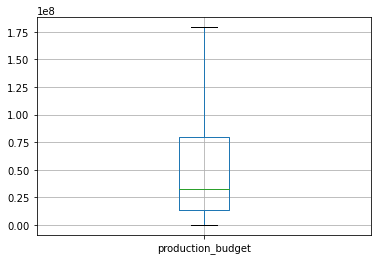

In [69]:
filtered_df.boxplot('production_budget', showfliers=False);

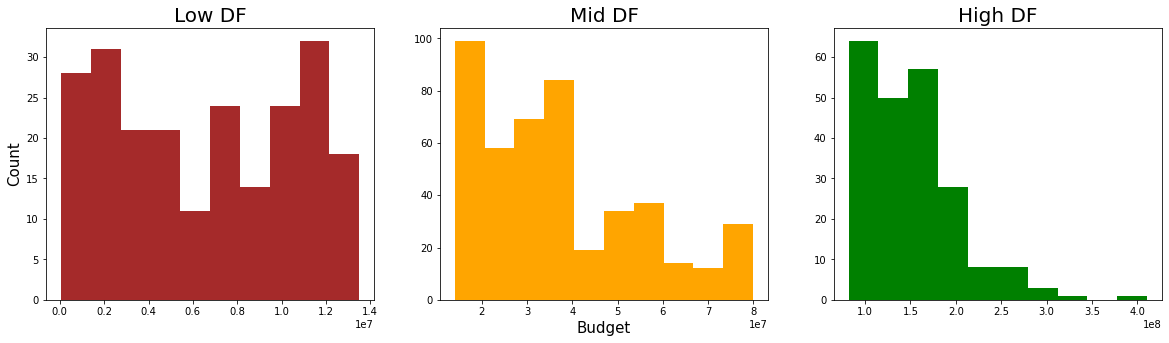

In [28]:
fig, axs = plt.subplots(1,3)
filtered_df_low['production_budget'].hist(ax=axs[0],figsize=(20,5),color='brown')
filtered_df_mid['production_budget'].hist(ax=axs[1],figsize=(20,5),color='orange')
filtered_df_high['production_budget'].hist(ax=axs[2],figsize=(20,5),color='green')
axs[0].set_title('Low DF',fontsize=20)
axs[0].set_ylabel('Count',fontsize=15)
axs[0].grid(False)
axs[1].set_title('Mid DF',fontsize=20)
axs[1].set_xlabel('Budget',fontsize=15)
axs[1].grid(False)
axs[2].set_title('High DF',fontsize=20);
axs[2].grid(False);

In [75]:
# recommend Median Production Budget for each of the top 3 genres in the High DF
prod_budget_high = {}

# For each genre in the top 3 genre list, make a list of profit margin for that certain genre
for genre in top3_genre:
    prod_budget_high[genre] = []
    for index, row in filtered_df_high.iterrows():
        if genre in row['genres']:
            prod_budget_high[genre].append(row['production_budget'])

product_budget_avg_high = {}

#For each genre, find the average of profit margin

for k,v in prod_budget_high.items():
    product_budget_avg_high[k] = sum(v) / float(len(v))
prod_budget_avg_high = dict(sorted(product_budget_avg_high.items(),key = lambda x:x[1]))

AttributeError: 'list' object has no attribute 'median'

In [127]:
adv_med = filtered_df_high[(filtered_df_high['genres'].str.contains('Adventure'))]
com_med = filtered_df_high[(filtered_df_high['genres'].str.contains('Comedy'))]
dram_med = filtered_df_high[(filtered_df_high['genres'].str.contains('Drama'))]
adv_med = int(adv_med['production_budget'].median())
com_med = int(com_med['production_budget'].median())
dram_med = int(dram_med['production_budget'].median())

In [128]:
high_df_dict = {'Adventure': adv_med, 'Comedy': com_med, 'Drama': dram_med}

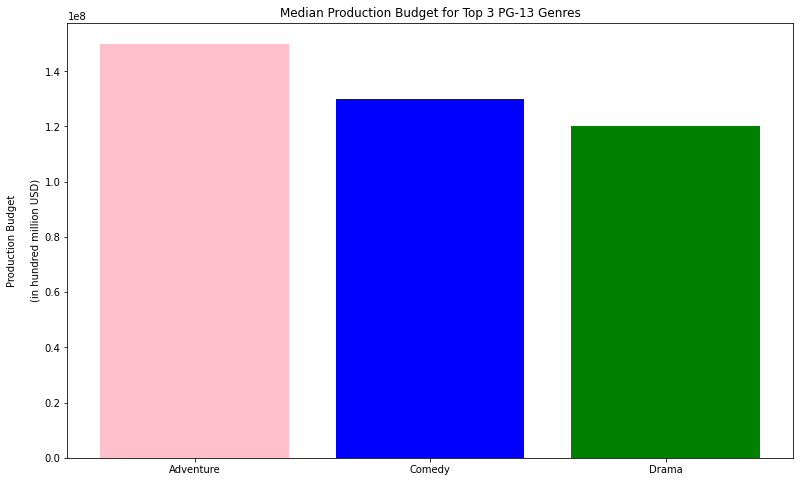

In [132]:
x = list(high_df_dict.keys())
fig, ax = plt.subplots(figsize=(13,8))
ax.bar(x=x,height=high_df_dict.values(),color=['pink','blue','green'])
ax.set_ylabel('Production Budget\n\n(in hundred million USD)')
ax.set_title('Median Production Budget for Top 3 PG-13 Genres');

In [74]:
print(product_budget_avg_high)

{'Adventure': 157121505.37634408, 'Comedy': 131601449.27536231, 'Drama': 128729729.72972973}


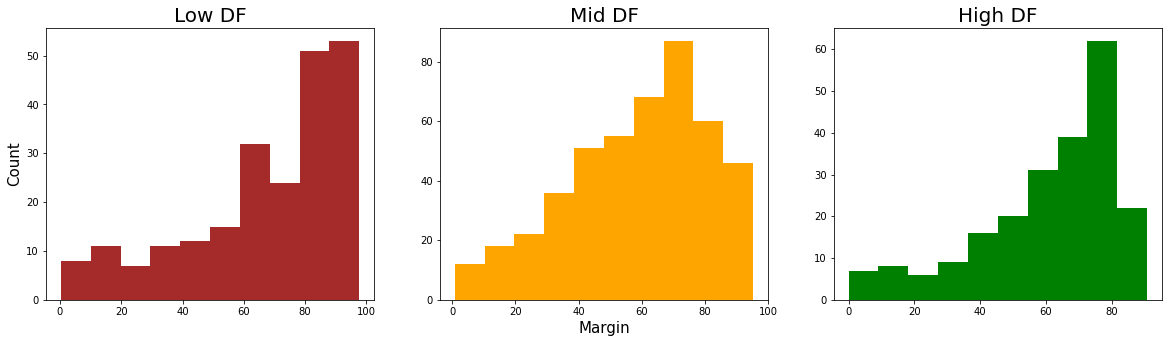

In [30]:
fig, axs = plt.subplots(1,3)
filtered_df_low['net_profit_margin'].hist(ax=axs[0],figsize=(20,5),color='brown')
filtered_df_mid['net_profit_margin'].hist(ax=axs[1],figsize=(20,5),color='orange')
filtered_df_high['net_profit_margin'].hist(ax=axs[2],figsize=(20,5),color='green')
axs[0].set_title('Low DF',fontsize=20)
axs[0].set_ylabel('Count',fontsize=15)
axs[0].grid(False)
axs[1].set_title('Mid DF',fontsize=20)
axs[1].set_xlabel('Margin',fontsize=15)
axs[1].grid(False)
axs[2].set_title('High DF',fontsize=20)
axs[2].grid(False);

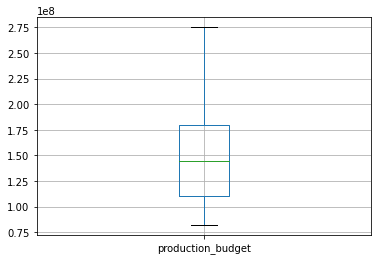

In [72]:
filtered_df_high.boxplot('production_budget',showfliers=False);

In [59]:
display(filtered_df_low.corr(), filtered_df_mid.corr(), filtered_df_high.corr())

,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
production_budget,1.000000,0.426590,0.448646,0.371979,-0.080656
domestic_gross,0.426590,1.000000,0.792219,0.782729,0.476479
worldwide_gross,0.448646,0.792219,1.000000,0.996465,0.466304
profit,0.371979,0.782729,0.996465,1.000000,0.491903
net_profit_margin,-0.080656,0.476479,0.466304,0.491903,1.000000


,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
production_budget,1.000000,0.434743,0.491629,0.386605,-0.043551
domestic_gross,0.434743,1.000000,0.893544,0.888044,0.575152
worldwide_gross,0.491629,0.893544,1.000000,0.993162,0.557546
profit,0.386605,0.888044,0.993162,1.000000,0.596320
net_profit_margin,-0.043551,0.575152,0.557546,0.596320,1.000000


,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
production_budget,1.000000,0.492252,0.582280,0.460859,0.065580
domestic_gross,0.492252,1.000000,0.922375,0.920851,0.621366
worldwide_gross,0.582280,0.922375,1.000000,0.989854,0.691905
profit,0.460859,0.920851,0.989854,1.000000,0.743835
net_profit_margin,0.065580,0.621366,0.691905,0.743835,1.000000


In [60]:
display(filtered_df_low.describe(), filtered_df_mid.describe(), filtered_df_high.describe())

,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
count,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,224.000000
mean,6.580369e+06,1.932544e+07,3.673542e+07,3.015505e+07,67.338648
std,4.180338e+06,2.233832e+07,4.618931e+07,4.447103e+07,25.267627
min,5.000000e+04,0.000000e+00,2.368060e+05,3.491300e+04,0.290098
25%,2.500000e+06,3.006282e+06,9.971306e+06,4.394842e+06,53.945220
50%,6.650000e+06,1.231642e+07,2.154379e+07,1.406665e+07,75.430887
75%,1.000000e+07,2.790396e+07,4.586713e+07,3.830390e+07,87.894797
max,1.350000e+07,1.248724e+08,3.312667e+08,3.182667e+08,97.700991


,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
count,4.550000e+02,4.550000e+02,4.550000e+02,4.550000e+02,455.000000
mean,3.740286e+07,6.423670e+07,1.329151e+08,9.551225e+07,58.802159
std,1.789595e+07,5.848945e+07,1.413724e+08,1.334870e+08,22.066946
min,1.400000e+07,0.000000e+00,1.536230e+07,3.622980e+05,0.775180
25%,2.225000e+07,3.082511e+07,5.697225e+07,2.410314e+07,43.370992
50%,3.400000e+07,4.687450e+07,9.208846e+07,5.467258e+07,62.261624
75%,5.000000e+07,7.564132e+07,1.588281e+08,1.157153e+08,75.649333
max,8.000000e+07,4.080107e+08,1.160336e+09,1.086336e+09,95.309031


,production_budget,domestic_gross,worldwide_gross,profit,net_profit_margin
count,2.200000e+02,2.200000e+02,2.200000e+02,2.200000e+02,220.000000
mean,1.501800e+08,1.722083e+08,5.009594e+08,3.507794e+08,60.694836
std,5.169034e+07,1.235449e+08,3.228610e+08,2.957634e+08,21.010991
min,8.200000e+07,2.037791e+07,1.030393e+08,4.778400e+04,0.026540
25%,1.100000e+08,8.359029e+07,2.636089e+08,1.342668e+08,51.430150
50%,1.445000e+08,1.435742e+08,4.027122e+08,2.774149e+08,66.468886
75%,1.792500e+08,2.234651e+08,6.554399e+08,4.961799e+08,76.414280
max,4.106000e+08,7.000596e+08,2.048134e+09,1.748134e+09,90.668703


([0], [Text(0, 0, '')])

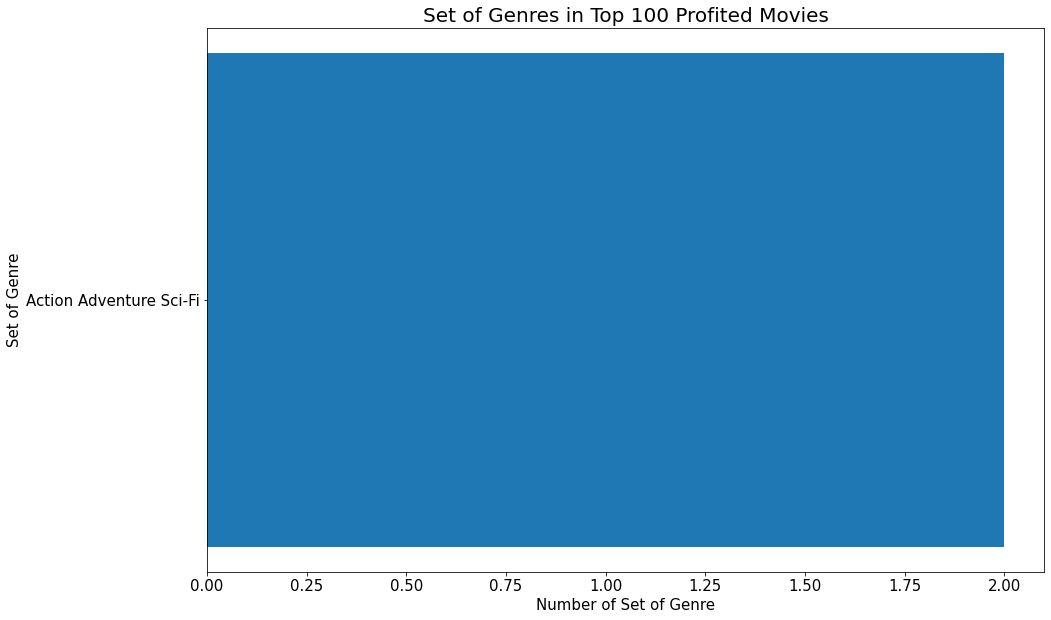

In [48]:
# Make a list of top 100 genres from the organized dataframe
top_3 = list(filtered_df['genres'].iloc[:2])

top_3_dict = {}

# Make a dictionary to count number of sets of genres
# For each set of genre, if the set of genre is in the dictionary, add a count to the value
# If not, then add a count to the value
for genre in top_3:
    if genre in top_3_dict.keys():
        top_3_dict[genre] += 1
    else:
        top_3_dict[genre] = 1

# Sort the dictionary by count
# We use lambda x while sorting so that we sort them by the values (x[1])
top_3_dict = dict(sorted(top_3_dict.items(), key=lambda x : x[1]))

#Make a bar chart to represent set of genres in top 100 profited movies
fig, ax = plt.subplots(figsize=(15, 10))

x = list(top_3_dict.keys())
height = list(top_3_dict.values())

ax.barh(x, height)
ax.set_title('Set of Genres in Top 100 Profited Movies', fontsize=20)
ax.set_xlabel('Number of Set of Genre', fontsize=15)
ax.set_ylabel('Set of Genre', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [42]:
# Make a list of top 10 set of genres from the graph above
top3_set_genre = list(top_3_dict.keys())

# Create a new dataframe so that we have data that have profit margin above 0%,

genre_profit_margin_set2 = {}

# For each set of genres in the top 10 set of genres list, make a list of profit margin for that certain set of genres
for genre in top3_set_genre:
    genre_profit_margin_set2[genre] = []
    for index, row in filtered_df.iterrows():
        if genre in row['genres']:
            genre_profit_margin_set2[genre].append(row['net_profit_margin'])

average_profit_margin_genre_set2 = {}

# For each set of genres, find the average of profit margin
for k,v in genre_profit_margin_set2.items():
    average_profit_margin_genre_set2[k] = sum(v)/ float(len(v))

# Sort the dictionary by count
# We use lambda x while sorting so that we sort them by the values (x[1])
average_profit_margin_genre_set2 = dict(sorted(average_profit_margin_genre_set2.items(), key=lambda x : x[1]))

# Make a bar graph that represents profit margin and top 10 genre
#fig, ax = plt.subplots(figsize=(15, 10))

#x = list(average_profit_margin_genre_set2.keys())
#height = list(average_profit_margin_genre_set2.values())

print(average_profit_margin_genre_set2)

{'Action Adventure Sci-Fi': 64.86373398296575}


In [ ]:
top2_genre_pg13 = list(genre_dict.keys())[:3]

# Create a new dataframe so that we have data that have profit margin above 0%

genre_profit_margin = {}

# For each genre in the top 3 genre list, make a list of profit margin for that certain genre
for genre in top2_genre_pg13:
    genre_profit_margin[genre] = []
    for index, row in condensed_profit_split_genre.iterrows():
        if genre in row['genres']:
            genre_profit_margin[genre].append(row['net_profit_margin'])

average_profit_margin_genre = {}

#For each genre, find the average of profit margin

for k,v in genre_profit_margin.items():
    average_profit_margin_genre[k] = sum(v) / float(len(v))
average_profit_margin_genre = dict(sorted(average_profit_margin_genre.items(),key = lambda x:x[1]))